Here is a model to forcast an election between two candidates A and B. There are $N$ people who will vote. After $n$ of them have voted, if $k$ of them voted for A we predict that the $n+1$-th person will vote for $A$ with probability $k/n$, and vote for $B$ with probability $1-k/n$.

Given the vote distribution at time $n_0$, find the probability that a particular candidate wins.

In [1]:
%pylab inline
import tqdm
%precision 4

Populating the interactive namespace from numpy and matplotlib


'%.4f'

* VAn, VBn: Number of votes for A, B after n steps
* Xn = VAn - VBn
* pn = VAn / n = (n + Xn) / 2 = probability of n+1 th vote going for a
* qn = 1 - pn
* fN[k] = 1 if k > N/2. (k ∈ {0, ..., N}) (fN = chance A wins given k people voted for A)
* Note, given at time n, k people voted for A, we must have Xn = k - (n-k) = 2k - n.
  So we can just ignore Xn, and index using k
* Recurrence relation: $f_n[k] = f_{n+1}[k+1] p_n[k] + f_{n+1}[k] q_n[k]$


In [2]:
# Total number of people
N = 10000
n0 = N//10 # Number of people we know have voted

fN = ones(N+1)
fN[0:N//2] = 0


fn = fN
for n in tqdm.tqdm_notebook( range(N-1, n0-1, -1) ):
    # Probability next person votes for A is an array.
    # If k people vote for A, pn[k] = k/n
    pn = arange(n+1)/n  # Compact way of writing pn[k] = k/n
    
    # Solve the recurrance relation
    fn = pn*fn[1:] + (1-pn)*fn[:-1]

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
# fn[k] is now the chance A wins given that at time n0, k people voted for him.
fn[n0//2+1]

0.527912994009912

Text(0.5, 0, 'Number of votes for A after 1000 votes were cast')

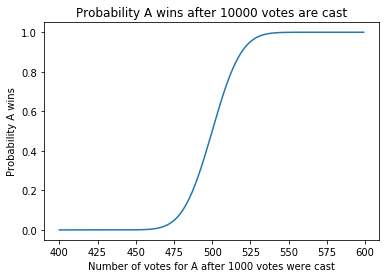

In [4]:
nn = range( int(.4*n0), int(.6*n0) )
#nn = range(n0+1)
plot( nn, fn[nn] )
title( f'Probability A wins after {N} votes are cast')
ylabel( 'Probability A wins' )
xlabel( f'Number of votes for A after {n0} votes were cast')